In this Exploratory data analysis, we aim to analyse the dataset and answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import utils
src_path = utils.src_path()

In [3]:
import sys
sys.path.insert(1, src_path)
import data_loader as dl # type: ignore

### Load the data

In [4]:
df = dl.load_and_preprocess_data(r"../data/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,IsAlone,Title,TitleEncoded,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,Mr,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,Mrs,5,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Miss,3,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,1,0,Mrs,5,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Mr,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,1,Rare,6,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,0,1,Miss,3,3,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,3,0,Miss,3,0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0,1,Mr,4,0,2


The loaded data has been cleaned and processed for the predictive model. New features like HasCabin, FamilySize, IsAlone, Title, Title_encoded,Age_Category, Fare_Category are added to the dataset.

### Exploratory data analysis

In [5]:
df.shape

(891, 19)

In [6]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
HasCabin          0
FamilySize        0
IsAlone           0
Title             0
TitleEncoded      0
AgeCategory       0
FareCategory      0
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,IsAlone,Title,TitleEncoded,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,Mr,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,Mrs,5,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Miss,3,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,1,0,Mrs,5,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Mr,4,0,1


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,TitleEncoded,AgeCategory,FareCategory
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.228956,0.904602,0.602694,3.881033,0.446689,1.437710
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.420397,1.613459,0.489615,0.798446,0.968155,0.626469
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,4.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000,1.000000,6.000000,3.000000,4.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  HasCabin      891 non-null    int64  
 13  FamilySize    891 non-null    int64  
 14  IsAlone       891 non-null    int64  
 15  Title         891 non-null    object 
 16  TitleEncoded  891 non-null    int64  
 17  AgeCategory   891 non-null    int64  
 18  FareCategory  891 non-null    

In [10]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
HasCabin          int64
FamilySize        int64
IsAlone           int64
Title            object
TitleEncoded      int64
AgeCategory       int64
FareCategory      int64
dtype: object

In [11]:
df.Survived.value_counts()/len(df)*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [ ]:
compact_df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Title', 'Embarked'])
compact_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,TitleEncoded,AgeCategory,FareCategory
0,0,3,1,22.0,1,0,7.2500,0,1,0,4,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,5,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,3,0,1
3,1,1,0,35.0,1,0,53.1000,1,1,0,5,0,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1,6,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,1,3,3,2
888,0,3,0,28.0,1,2,23.4500,0,3,0,3,0,2
889,1,1,1,26.0,0,0,30.0000,1,0,1,4,0,2


In [ ]:
compact_df.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,TitleEncoded,AgeCategory,FareCategory
Survived,,,,,,,,,,,,
0,2.531876,0.852459,30.028233,0.553734,0.329690,22.117887,0.123862,0.883424,0.681239,3.939891,0.420765,1.377049
1,1.950292,0.318713,28.291433,0.473684,0.464912,48.395408,0.397661,0.938596,0.476608,3.786550,0.488304,1.535088


In [ ]:
compact_df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,TitleEncoded,AgeCategory,FareCategory
Sex,,,,,,,,,,,,
0,0.742038,2.159236,27.929936,0.694268,0.649682,44.479818,0.308917,1.343949,0.401274,3.789809,0.531847,1.480892
1,0.188908,2.389948,30.140676,0.429809,0.235702,25.523893,0.185442,0.665511,0.712305,3.930676,0.400347,1.414211


#### Correlation Matrix and Heatmap

In [ ]:
compact_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,TitleEncoded,AgeCategory,FareCategory
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.316912,0.016639,-0.203367,-0.093450,0.033945,0.122752
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.725541,0.065997,0.135207,-0.150278,0.044642,-0.464157
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.140391,-0.200988,0.303646,0.084330,-0.064923,-0.050876
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.240314,-0.245619,0.171647,0.459034,-0.316017,0.107344
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.040460,0.890712,-0.584471,-0.204895,0.093500,0.222865
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.036987,0.783111,-0.583398,-0.107457,0.102406,0.198429
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.482075,0.217138,-0.271832,-0.025481,0.006867,0.164704
HasCabin,0.316912,-0.725541,-0.140391,0.240314,-0.040460,0.036987,0.482075,1.000000,-0.009175,-0.158029,0.044418,-0.011386,0.297391
FamilySize,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.217138,-0.009175,1.000000,-0.690922,-0.193722,0.115065,0.251452
IsAlone,-0.203367,0.135207,0.303646,0.171647,-0.584471,-0.583398,-0.271832,-0.158029,-0.690922,1.000000,0.016916,-0.108732,-0.271258


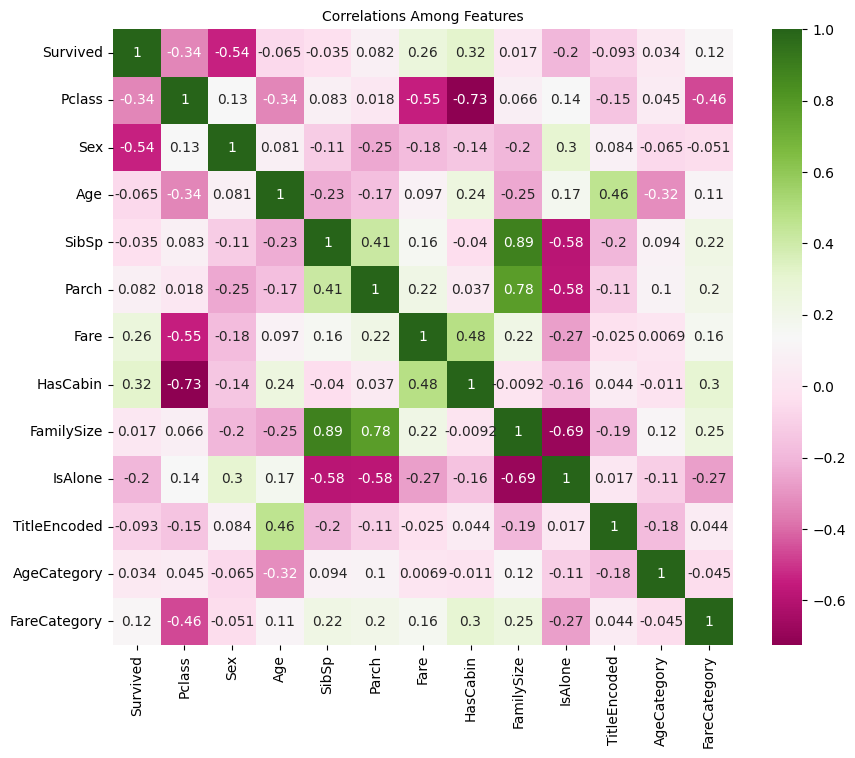

In [16]:
plt.subplots(figsize = (10,8))
sns.heatmap(compact_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 10)
plt.show()

#### Observations:
1. Sex:
Strong negative correlation: This indicates that being female was strongly associated with a higher chance of survival. This is a well-known fact from the Titanic tragedy.
2. FareCategory:
Moderate positive correlation: Passengers who paid higher fares (likely in higher classes) had a slightly better chance of survival. This aligns with the idea that those with higher social standing or greater financial means might have had access to better accommodations and potentially quicker access to lifeboats.
3. Pclass:
Strong negative correlation: As expected, passengers in lower classes (Pclass 3) had a significantly lower survival rate compared to those in higher classes (Pclass 1 and 2). This likely reflects factors such as location on the ship, access to lifeboats, and the order of rescue.
4. AgeCategory:
Moderate correlation: The relationship between 'AgeCategory' and 'Survived' is likely complex. Children ('Child') might have had a higher survival rate due to preferential treatment during rescue efforts. However, the correlation might not be linear across all age groups.
5. IsAlone:
Moderate negative correlation: Passengers traveling alone had a slightly lower chance of survival compared to those traveling with family. This could be due to various factors, such as reduced chances of assistance or support during the crisis.
Overall:

The heatmap confirms several key factors that influenced survival on the Titanic:
* Gender: Women had a significantly higher survival rate than men.
* Socioeconomic Status: Passengers in higher social classes (higher Pclass, higher fares) had a better chance of survival.
* Age: While the specific relationship between age and survival is nuanced, certain age groups might have had higher or lower survival rates.
* Family Status: Traveling with family members might have had a slight positive impact on survival chances.

#### Gender and Survived

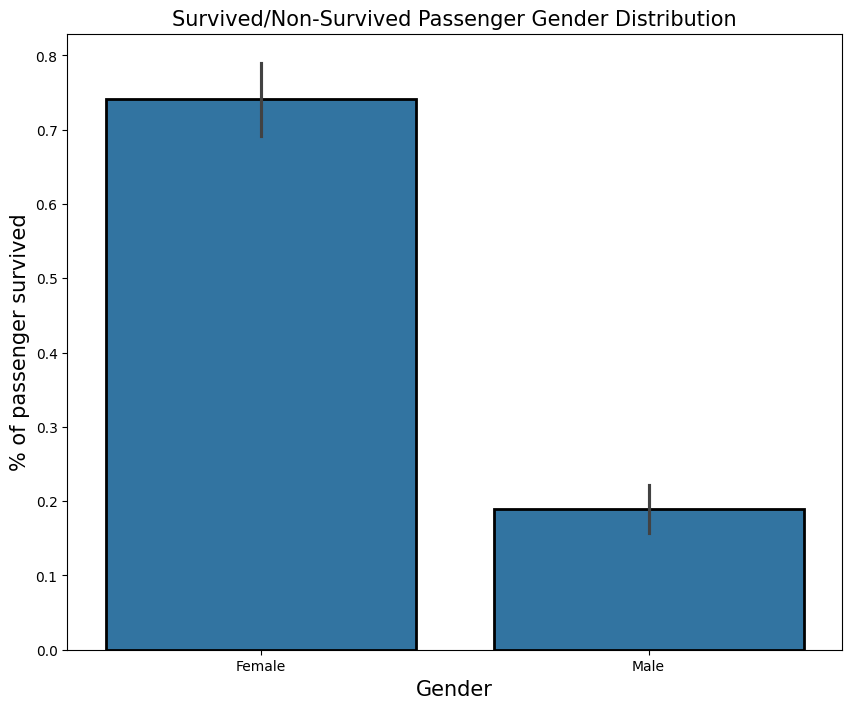

In [17]:
plt.subplots(figsize = (10,8))
sns.barplot(x = "Sex", y = "Survived", data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 15)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(df.Sex.unique()), labels)
plt.show()
# 1 is for male and 0 is for female.

This graph clearly shows that a much higher percentage of female passengers survived the Titanic compared to male passengers. You can see a big difference in the bar heights, with the bar for females being much taller. This suggests that women were given priority during the rescue efforts, which is consistent with the 'women and children first' policy.

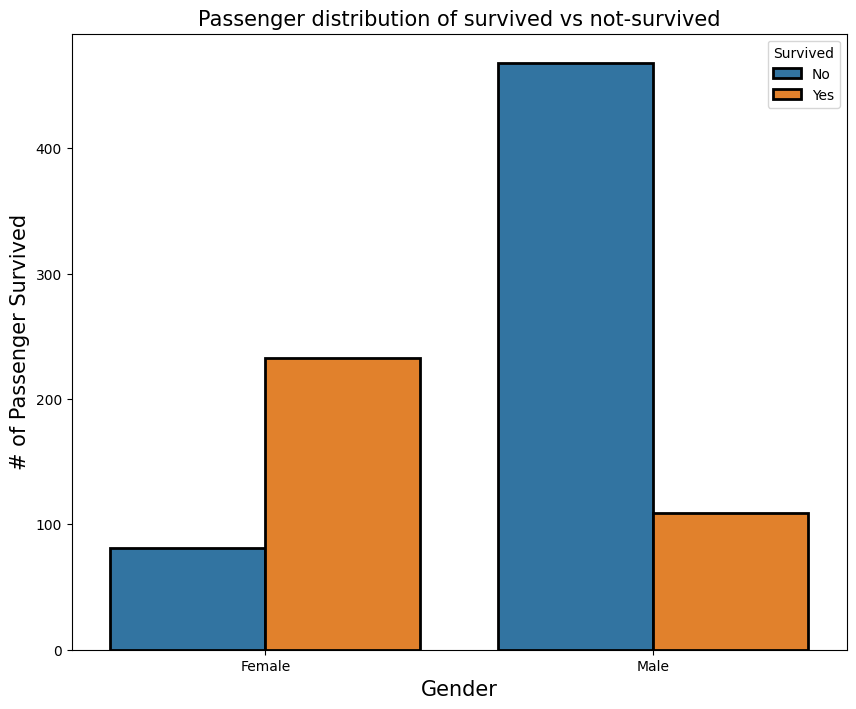

In [18]:
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Sex',data=df,hue='Survived',edgecolor=(0,0,0),linewidth=2)
plt.title('Passenger distribution of survived vs not-survived',fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
plt.xticks(sorted(df.Survived.unique()),labels)
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

This graph shows that a much higher ratio of female passengers survived the Titanic compared to male passengers. You can clearly see that the blue bar (representing non-survivors) is significantly shoretr than the blue bar for males.

#### Pclass and Survived

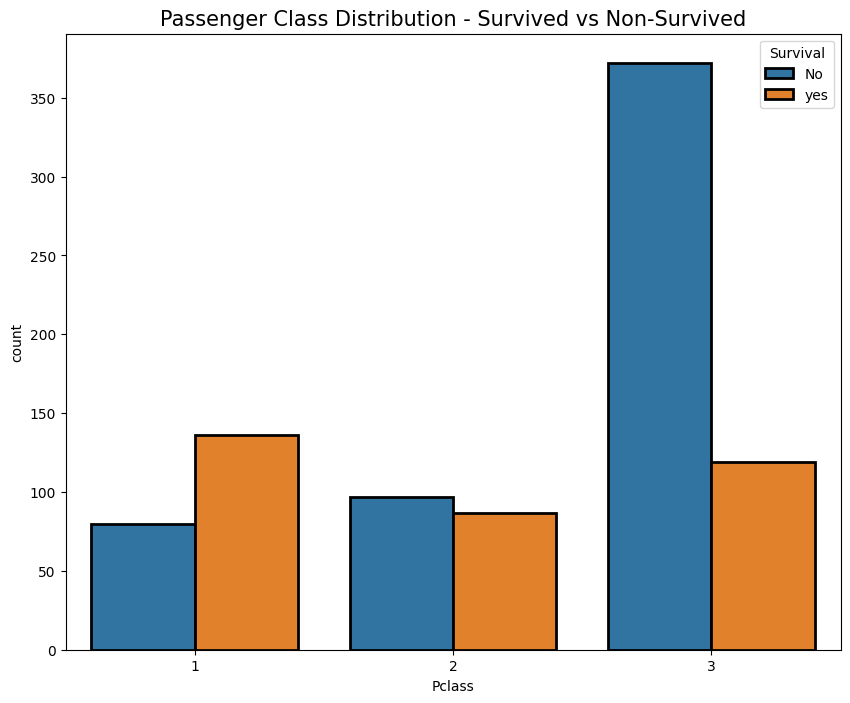

In [19]:
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=df,edgecolor=(0,0,0),linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text("yes")

This graph shows that passengers in First Class (Pclass 1) had a much higher chance of survival compared to those in Second and Third Class.  You can see that the blue bars (representing non-survivors) are shorter for First Class,and taller for the Third Class. The orange bars (representing survivors) are much taller for First Class and shorter for the Third Class. This suggests that passengers in higher classes had better access to lifeboats and resources during the sinking.

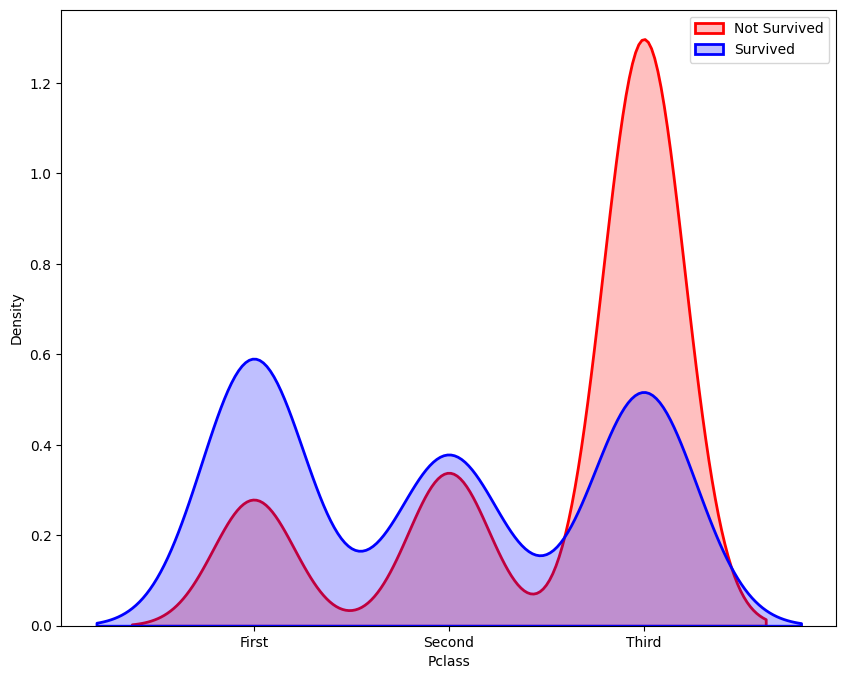

In [20]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],fill=True,color='red',label='Not Survived',edgecolor=('red'),linewidth=2)
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],fill=True,color='blue',label='Survived',edgecolor=('blue'),linewidth=2)
labels = ['First', 'Second', 'Third']
plt.legend()
plt.xticks(sorted(df.Pclass.unique()),labels)
plt.show()

This graph shows the distribution of passenger classes for those who survived and those who didn't. It looks like a much higher proportion of people in First Class survived compared to those in Third Class. We can see this because the blue curve (for survivors) peaks much higher in the First Class section compared to the red curve (for those who didn't survive). In contrast, the red curve is much higher in the Third Class section, suggesting that a larger proportion of passengers in Third Class unfortunately did not survive.

#### Fare and Survived

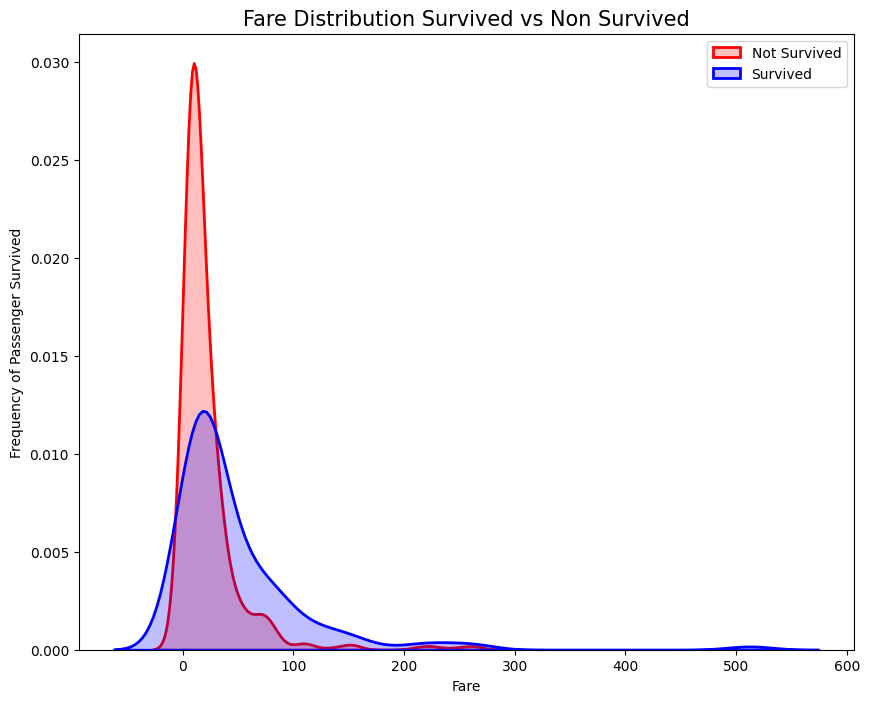

In [21]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'],color='red',fill=True,label='Not Survived',edgecolor=('red'),linewidth=2)
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'],color='blue',fill=True,label='Survived',edgecolor=('blue'),linewidth=2)
plt.title('Fare Distribution Survived vs Non Survived',fontsize=15)
plt.ylabel('Frequency of Passenger Survived',fontsize=10)
plt.xlabel('Fare',fontsize=10)
plt.legend()
plt.show()

This graph shows that passengers who paid higher fares were more likely to survive. You can see that the blue curve, representing survivors, peaks at higher fare values compared to the red curve, representing those who didn't survive. This suggests that passengers with higher ticket prices might have had access to better accommodations or were prioritized during rescue efforts.

#### Age and Survived

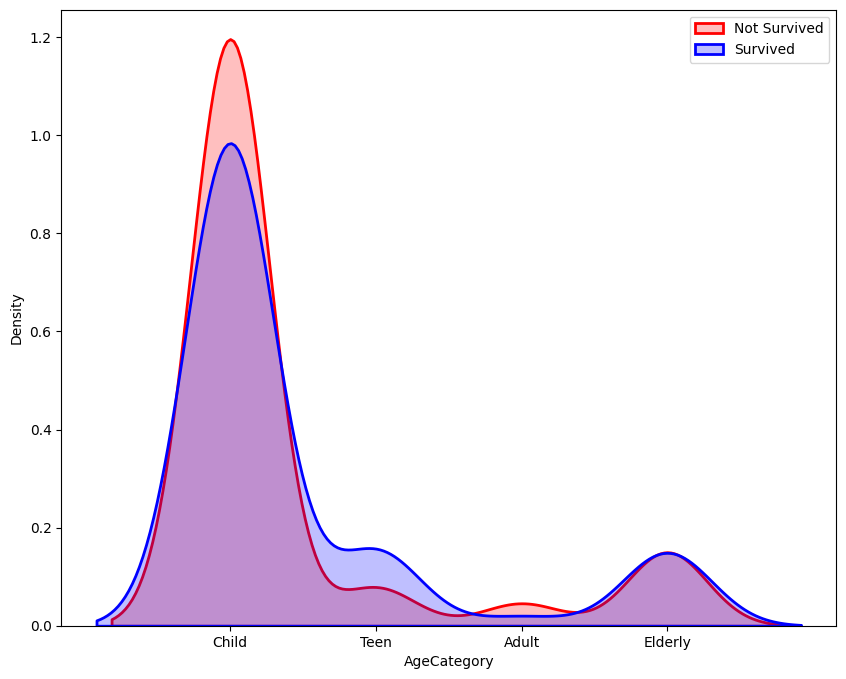

In [22]:
fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived']==0),'AgeCategory'],color='red',fill=True,label='Not Survived',edgecolor=('red'),linewidth=2)
sns.kdeplot(df.loc[(df['Survived']==1),'AgeCategory'],color='blue',fill=True,label='Survived',edgecolor=('blue'),linewidth=2)
labels = ['Child', 'Teen', 'Adult', 'Elderly']
plt.xticks(sorted(df.AgeCategory.unique()),labels)
plt.legend()
plt.show()

This graph shows that children and elderly passengers had a lower chance of survival compared to teenagers and adults. You can see that the red curve (for those who didn't survive) peaks higher in the 'Child' and 'Elderly' categories. In contrast, the blue curve (for survivors) is more prominent in the 'Teen' and 'Adult' categories.

#### TitleEncoded and Survived

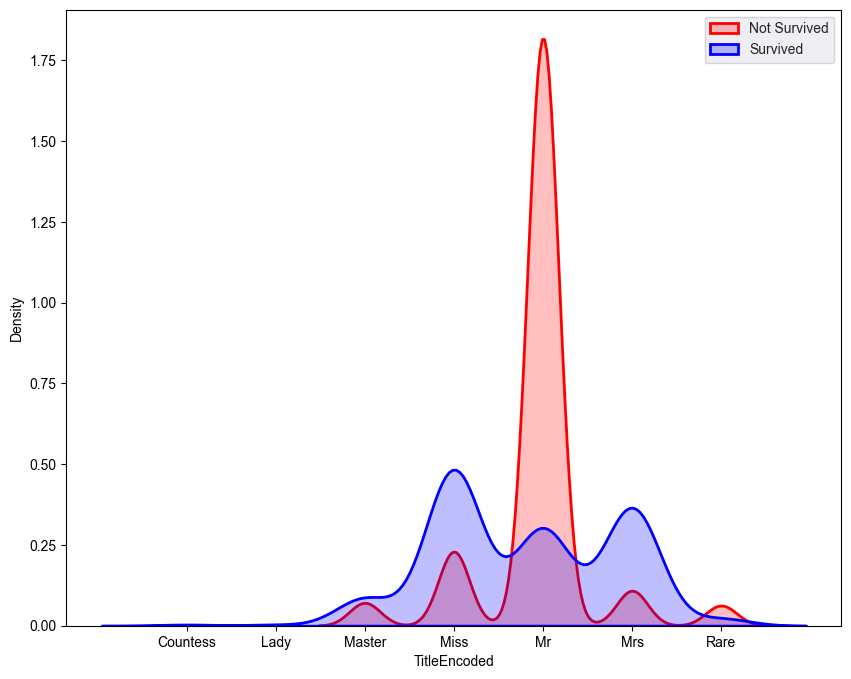

In [23]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(df.loc[(df['Survived']==0),'TitleEncoded'],color='red',fill=True,label='Not Survived',edgecolor=('red'),linewidth=2)
sns.kdeplot(df.loc[(df['Survived']==1),'TitleEncoded'],color='blue',fill=True,label='Survived',edgecolor=('blue'),linewidth=2)
labels = ['Countess','Lady','Master','Miss','Mr','Mrs','Rare']
plt.xticks(sorted(df.TitleEncoded.unique()),labels)
plt.legend()
plt.show()

This graph shows that passengers with certain titles had a higher chance of survival. We can see that the blue curve (representing survivors) peaks higher for titles like 'Miss' and 'Mrs', suggesting that women and children were more likely to survive. On the other hand, the red curve (for those who didn't survive) is much higher for titles like 'Mr', indicating a lower survival rate for men.

### Conclusion
Looking at these graphs, it's clear that several factors played a significant role in passenger survival on the Titanic. Women and children ('Miss', 'Mrs', 'Master' titles) were more likely to survive, as were those in higher social classes (First Class). Age also seemed to play a role, with children and the elderly potentially facing higher risks. Interestingly, passengers who paid higher fares had a better chance of survival, likely due to better accommodations and access to lifeboats. Overall, the data suggests that survival was heavily influenced by social status, gender, and age.